<h1 style="text-align:center;">Statistics for Data Science</h1>

***
# Module - IV
***

## Outliers

The expectation of a data scienticts/analyst from data is to be able to make healthy inferences from it. One of the important obstacles that make it difficult to make healthy inferences from data is outliers in the dataset.

Let's assume that you are in a clean sea when you dive into the sea, and when you look down to the bottom of the water while standing still, you can see your feet and fish. When you move your feet, sand particles scatter everywhere and your view becomes blurry. You cannot know whether the next speat you take will be wrong or not.

Similary, datasets with outliers blur your view and affacet the quality of the inferences you make. Therefore, you must identify and take the necessary precautions if there are any outliers in your dataset before starting any analysis.

According to the definition of Wikipedia, an observation that is significantly far from other oversations is called an outlier or an extreme value. Outliers behave differently from the rest of the dataset and, therefore, attract attention.

We can give an example of how analytical outliers can be.

Let's say you are managing a sales team, and you are examining monthly sales figues of your team.



In [2]:
data = {
    'Mehmet' : 50000,
    'Hasan' : 30000,
    'Ayse' : 40000,
    'Ali' : 120000
}

data

{'Mehmet': 50000, 'Hasan': 30000, 'Ayse': 40000, 'Ali': 120000}

When we calculate the average sales figure of the team, we get 60,000 liras. If we use this figure to make decisions or projections, we may encounter problems. In fact, except for one sale made by Ali, no one in the team has exceeded 60,000 liras in sales. Ali's sales data, which is an outlier, may lead us to make incorrect analyses. There may be an exceptional reason for Ali's high sales this month. In short, outliers represent behavior that deviates from the norm according to the data.

Outliers can occur due to various reasons, such as:

* Errors during data entry or measurement.

* Data distortions.

* Truly exceptional performances (e.g., Cristiano Ronaldo, Michael Jordan, etc.) may cause outliers in the dataset.

### Types of Outliers

#### Point outliers:

Refers to the situation where an observation is different from the rest of the data set.

E.g. A student getting a grade of 100 when all other students in the class scored below 40.

#### Contextual outliers:

Refers to the situation where an observation is different from the rest of the data set in a specific context.

E.g. Economic downturn during the pandemic, but sales skyrocketing during the Black Friday period.

#### Collective outliers:

Refers to the situation where a group of observations in a data set is normal within itself, but appears as an outlier when compared to the entire data set.

E.g. All residents in a neighborhood moving at the same time.

# Outlier Analysis

Affects the distribution of data and statistics that represent the data such as mean, median, etc.

Affects the results obtained from models.

Reduces the power of statistical tests.

## Univariate Methods:

#### Box plot

Box plot shows the data distribution in quartiles. It can be displayed horizontally or vertically. The bottom and top edges of the box represent the 25th and 75th quartiles. The line in the middle of the box represents the median.

Advantages:

* It can be used even when the data is not normally distributed.

* It helps to make a quick inference before conducting an in-depth analysis.

* It allows for comparing multiple variables at the same time.

Disadvantages:

* Box plots provide a summary of all values in the dataset and do not include individual values. They should be used in combination with other methods for in-depth analysis and inference.


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


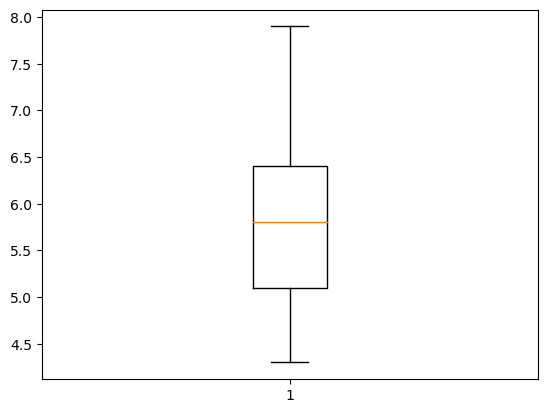

In [1]:
#Example

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Iris.csv")
print(df.head())


plt.boxplot(df['SepalLengthCm'])
plt.show()

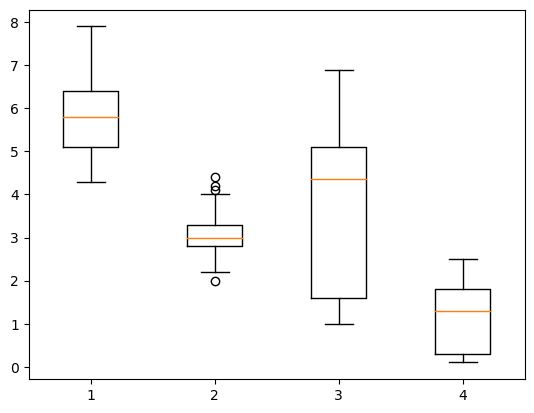

In [2]:
#Example

plt.boxplot([df['SepalLengthCm'],df['SepalWidthCm'],
             df['PetalLengthCm'],df['PetalWidthCm']])
plt.show()

#### Histogram

Histogram is a commonly used graph that shows the distribution of numerical data. Histogram allows us to see which values are more or less common in a dataset and how they are spread out. Outliers in a dataset are observations that are far away from the overall distribution of the data.

Advantages:

* Provides a quick insight into the data.

* The graph is easily understandable.

Disadvantages:

* The number of bins that make up the histogram can vary depending on the data. There is no universally applicable bin size for each situation. Different bin sizes can lead to different interpretations, potentially leading to incorrect conclusions.


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
0.00632
88.9762


C:\Users\hoguzcan\AppData\Local\Temp\ipykernel_6004\2681422974.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlieradded = crimeRate.append(pd.Series(maxadd))


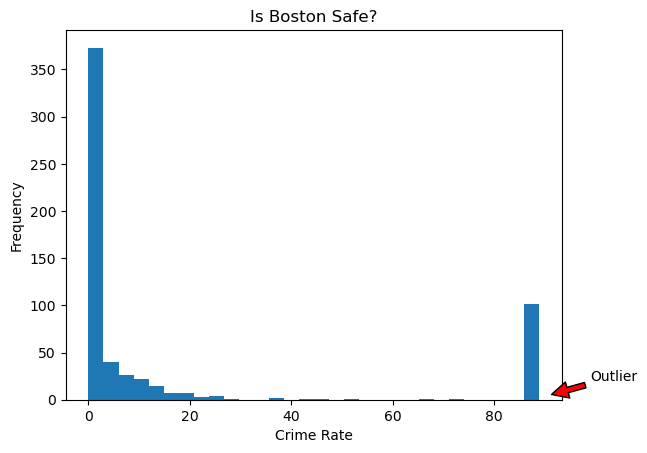

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Example

boston = pd.read_csv("housing.csv")

print(boston.head())

crimeRate = boston["CRIM"]

min = crimeRate.min()
max = crimeRate.max()
print(min)
print(max)

maxadd = [max]*100
outlieradded = crimeRate.append(pd.Series(maxadd))

plt.hist(outlieradded, bins=30)
plt.annotate("Outlier", xy = (max+2,5),
              xytext = (max+10,20),
              arrowprops = dict(facecolor = "red", shrink = 0.05))
plt.xlabel("Crime Rate")
plt.ylabel("Frequency")
plt.title("Is Boston Safe?")
plt.show()

#### Interquartile Range - IQR

It is common for data sets to not have a normal distribution. In such cases, methods are needed to identify outliers.

When examining the outliers of a variable that does not have a normal distribution, we can use the statistic of IQR. The interquartile range is the difference between the 75th and 25th percentiles of the data set. In other words, the interquartile range represents the middle 50% of the data.

In general, values that are less than 1.5 times the 25th percentile value or greater than 1.5 times the 75th percentile value are classified as outliers.

Advantages:

* It is not affected by individual observations in the data.

* It is useful even when the data is not normally distributed.

* It is easy to calculate.

Disadvantages:

* It may be insufficient if there is seasonality in the data set.


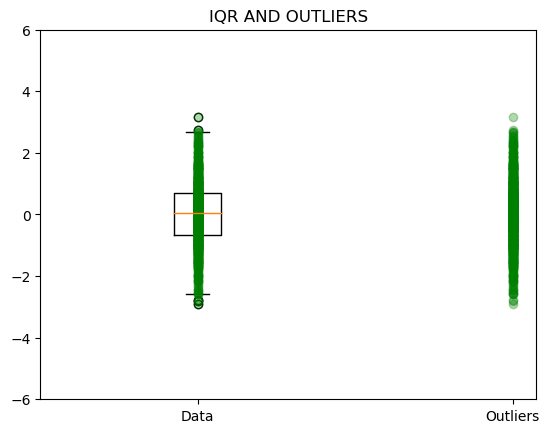

In [6]:
import numpy as np
import matplotlib.pyplot as plt



data=np.random.normal(0,1,1000)

q1 = np.percentile(data,25)
q3 = np.percentile(data,75)
iqr = q3 - q1
lowerlimit = q1 - 1.5 * iqr
upperlimit = q3 + 1.5 * iqr

plt.boxplot(data)
plt.plot(np.ones(len(data)) * 1, data, "go", alpha=0.3)
plt.plot(np.ones(len(data)) * 2, data, "go", alpha=0.3)
plt.ylim(-6,6)
plt.title("IQR AND OUTLIERS")
plt.xticks([1,2],["Data","Outliers"])
plt.show()

#### Median Absolute Deviation

Outliers affect the mean and standard deviation values, making outlier analysis less effective. In a data set with outliers, the median value is a more consistent and effective estimator than the mean value, as it is calculated based on the order of observations rather than their values.

The median absolute deviation (MAD), introduced and popularized by Frank Rudolf Hampel, is a measure of how far the observations in a data set are from the median value.

Median Absolute Deviation (MAD) = Median(|x - Median|) * C

where:
x: observation value,
Median: median value,
C: consistency constant

* The observations are sorted in ascending order to calculate the median value.

* The median value is then subtracted from each observation, and the absolute value of each difference is calculated.

* The absolute differences are sorted in ascending order to calculate the median value.

* Finally, the median absolute deviation is calculated by multiplying the consistency constant by the median of the absolute differences.

For normally distributed variables, there is a relationship between the standard deviation and the median absolute deviation. When the constant is taken as 1.4826 for a normally distributed variable, the median absolute deviation becomes a consistent estimator of the standard deviation. In this case, the lower and upper threshold values for identifying outliers can be calculated as follows:

Lower threshold = Median - 3 * (MAD)
Upper threshold = Median + 3 * (MAD)

In general, observations that are 3 median absolute deviations away from the median can be classified as outliers.

In skewed distributions where the variable is not normally distributed, effectiveness decreases. The "Double Median Absolute Deviation (Double MAD)" method is used for accurate analysis.

* The observations are sorted in ascending order to calculate the median value.

* The data is divided into two by using the median value.

* Two separate median absolute deviation values (MAD - Lower) for values smaller than or equal to the median value and (MAD - Upper) for values greater than the median value are calculated as described in the previous step. The median absolute deviation values should be calculated using the median value of the original data set.

Lower threshold = Median - 3 * (MAD - Lower)
Upper threshold = Median + 3 * (MAD - Upper)

Observations outside of the lower and upper thresholds are marked as outliers.



Outliers:  [48.27 44.3  48.17 50.81 45.35 48.33]


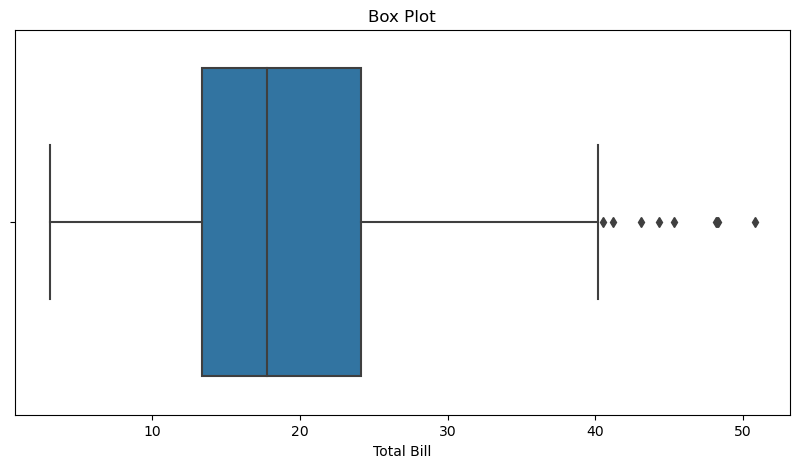

In [5]:
#Example

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def madCalculation(data, tresh=3.5):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    zScore = 0.6745 * (data - median) / mad
    outliers = np.where(np.abs(zScore) > tresh)
    return outliers

tips = sns.load_dataset("tips")
data = tips["total_bill"].values

outliers = madCalculation(data)
print("Outliers: ", data[outliers])

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=data, ax=ax)
ax.set_title("Box Plot")
ax.set_xlabel("Total Bill")
plt.show()


   total_bill   tip     sex smoker  day    time  size  price_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2              8.49   
1       10.34  1.66    Male     No  Sun  Dinner     3              3.45   
2       21.01  3.50    Male     No  Sun  Dinner     3              7.00   
3       23.68  3.31    Male     No  Sun  Dinner     2             11.84   
4       24.59  3.61  Female     No  Sun  Dinner     4              6.15   

           Payer Name         CC Number Payment ID  
0  Christy Cunningham  3560325168603410    Sun2959  
1      Douglas Tucker  4478071379779230    Sun4608  
2      Travis Walters  6011812112971322    Sun4458  
3    Nathaniel Harris  4676137647685994    Sun5260  
4        Tonya Carter  4832732618637221    Sun2251  


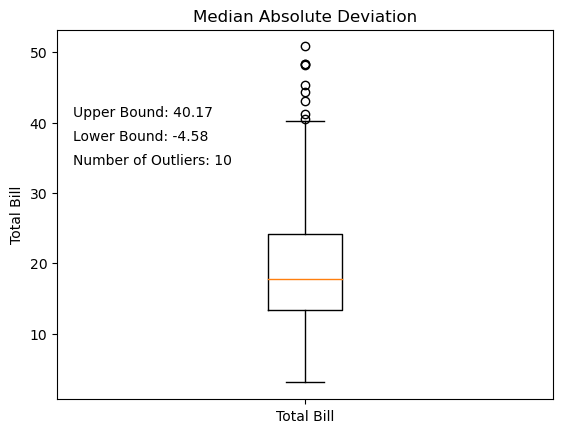

In [7]:
#Example

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("tips.csv")

print(df.head())

x = df["total_bill"]
mad = np.median(np.abs(x - np.median(x)))
constant = 1.4826
madStd = constant * mad

lower = np.median(x) - (3 * madStd)
upper = np.median(x) + (3 * madStd)

outlier = x[(x < lower) | (x > upper)]
plt.boxplot(x)
plt.title("Median Absolute Deviation")
plt.ylabel("Total Bill")
plt.xticks([1],["Total Bill"])
plt.figtext(0.15, 0.7, "Upper Bound: " + str(round(ust,2)))
plt.figtext(0.15, 0.65, "Lower Bound: " + str(round(alt,2)))
plt.figtext(0.15, 0.6, "Number of Outliers: " + str(aykiri.shape[0]))
plt.show()



In cases where the variable is bimodal, median is insufficient for detecting outliers. To solve this problem, the "Harrell-Davis Quantile Estimator" is used.

* The median value is calculated using the Harrell-Davis Quantile Estimator.

* The data is divided into two parts using the median value.

* Separate (MAD - Lower) values are calculated for values less than or equal to the median value and (MAD - Upper) values are calculated for values greater than the median value, using the median absolute deviation. When calculating the lower and upper MAD values, the median value of the main data should be used.

The median absolute deviation method is a robust method against outliers that can be used when the data is not normally distributed.

Advantages:

* Less affected by outliers since the median value is used for calculation

* More powerful than IQR since it takes all values in the data set into account

* Robustness against outliers makes it ideal for quickly and effectively scanning the dataset

Disadvantages:

* Less effective when the data is normally distributed.


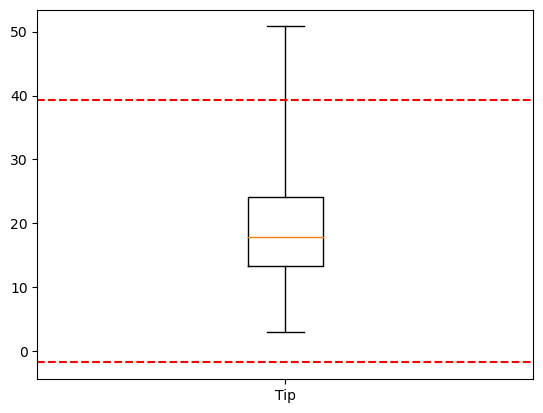

In [9]:
import seaborn as sns
from scipy.stats.mstats import hdquantiles

tips = sns.load_dataset("tips")

variable = tips["total_bill"]

q1, q3 = hdquantiles(variable, prob = [0.25,0.75])
mad = np.median(np.abs(variable - np.median(variable)))

lower = q1 - (3 * mad)
upper = q3 + (3 * mad)

plt.boxplot(variable, whis = (0,100))
plt.axhline(lower, color = 'r',linestyle = '--')
plt.axhline(upper, color = 'r',linestyle = '--')
plt.xticks([1], ["Tip"])
plt.show()

#### Z-Score

Z-score indicates how many standard deviations a data point is from the mean in a normally distributed data set. For any given observation, the z-score is calculated by subtracting the mean from the observation and then dividing the result by the standard deviation.

$$Z = \frac{X - \text{mean}}{\text{std}}$$

The z-score method can be used when observations are normally or approximately normally distributed.

In a normally distributed variable, we assume that:

68% of the observations are within one standard deviation of the mean,
95% of the observations are within two standard deviations of the mean,
99.7% of the observations are within three standard deviations of the mean.

Advantages:

* Allows for comparison of data points on different scales.
* Simple and quick to apply.

Disadvantages:

* Affected by outliers in the data.
* In cases where the data is not normally distributed, the data needs to be normalized before use.
* Suitable for small to medium-sized datasets.

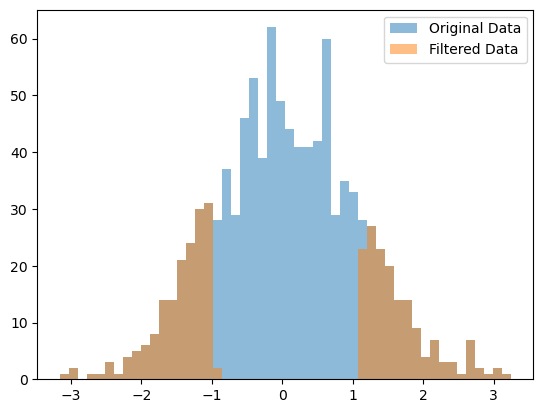

In [10]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

data = np.random.normal(loc=0, scale=1, size=1000)

z_score = sp.stats.zscore(data)

threshold = 1

filtered_data = data[np.abs(z_score) > threshold]

plt.hist(data, bins=50, alpha=0.5, label="Original Data")
plt.hist(filtered_data, bins=50, alpha=0.5, label="Filtered Data")
plt.legend(loc="upper right")
plt.show()

#### Hampel Filter

The Hampel filter is a robust outlier detection method that uses the median absolute deviation value.

For each observation, a median and standard deviation value is calculated using all neighboring values within an 'n' sized window (n/2 preceding and succeeding neighboring values of the observation). If an observation is 't' standard deviations away from the median, it is marked as an 'outlier'. The higher the Hampel value, the more likely the observation is an outlier.

The Hampel filter uses two parameters:

    n: The size of the window
    t: The number of standard deviations used to identify an observation as an outlier
    The value of 't' determines the aggressiveness of the filter. Higher values of 't' result in stricter filtering, while lower values result in more observations being identified as outliers.

Advantages:

* Useful for detecting outliers in time series data.

Disadvantages:

* It may be insufficient in predicting outliers at the beginning and end of the data.
* It can have difficulty in detecting outliers when they are close to each other.


[ 0.          0.          0.31185246  0.50779431  0.56021054  0.6257165
  0.77191954  0.83832333  0.60467748  0.8804228   0.87346977  0.9945039
  0.83579918  0.88776046  1.06892034  1.12827483  0.87167852  0.8158142
  0.50967717  0.71432472  0.53696443  0.45019244  0.39605815  0.13296151
  0.080908   -0.19078689 -0.18489895 -0.27819742 -0.49605594 -0.52932732
 -0.86927738 -0.67220034 -0.79262092 -0.92157745 -0.81929748 -0.9010872
 -0.90624051 -1.02328488 -1.08502257 -0.98875853 -0.82025068 -0.8502273
 -0.93719027 -0.56321067 -0.72144757 -0.47546255 -0.32866641 -0.39328924
  0.          0.        ]


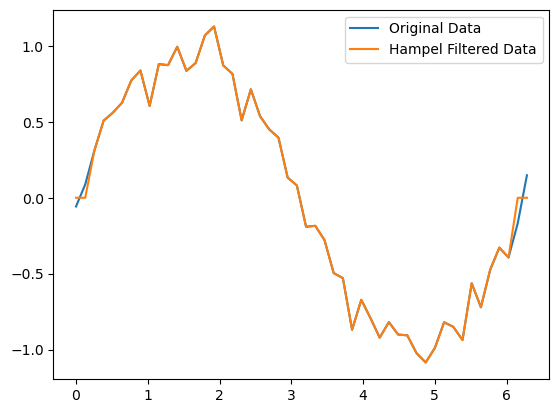

In [12]:
#Example

import numpy as np
import matplotlib.pyplot as plt

def hampel_filter(values, window_size=7, n_sigmas=3):
    mad = np.median(np.abs(values - np.median(values)))
    threshold = n_sigmas * 1.4826 * mad
    filtered_values = np.zeros_like(values)
    for i in range(window_size//2, len(values) - window_size//2):
        window = values[i - window_size//2:i + window_size//2 + 1]
        median = np.median(window)
        if abs(values[i] - median) > threshold:
            filtered_values[i] = median
        else:
             filtered_values[i] = values[i]
    return filtered_values

x = np.linspace(0,2*np.pi, 50)
y = np.sin(x) + np.random.normal(0,0.1,50)

filtreY = hampel_filter(y, window_size = 5, n_sigmas = 3)
print(filtreY)

plt.plot(x, y, label = "Original Data")
plt.plot(x, filtreY, label = "Hampel Filtered Data")
plt.legend()
plt.show()

#### Binomial Distribution

It is a theoretical distribution that applies to events with two possible outcomes.

In each repetition of the event, the probability of the desired outcome remains the same.

Binomial distribution shows the number of times the desired outcome occurs in 'n' repetitions of a two-outcome event, with the assumption that each repetition is independent of the others.

Binomial distribution is defined based on the probability of obtaining a certain number of successes in a fixed number of trials for an experiment where there are two possible outcomes for each trial, success and failure.

The probability of success is denoted by p and the probability of failure is denoted by q = 1-p. In this case, the probability of obtaining 'r' successes in 'n' trials can be calculated using the following formula:

P(r) = C(n,r) * p^r * q^(n-r)

Here, C(n,r) calculates the probability of selecting 'r' successful outcomes out of 'n' trials using the combination operation. C(n,r) is calculated as C(n,r) = n! / (r! * (n-r)!).

For example, in a coin-toss game, suppose the probability of getting "heads" is 0.5 and the probability of getting "tails" is also 0.5. The probability of getting 3 "heads" in 5 tosses can be calculated using binomial distribution as follows:

P(3) = C(5,3) * 0.5^3 * 0.5^(5-3) = 10 * 0.125 * 0.125 = 0.078125

In this case, the probability of getting 3 "heads" in 5 tosses is approximately 7.8%.

Binomial distribution can be used to perform various calculations, such as:

* Calculating the probability of the result of a two-outcome test, such as checking for a certain feature in a product on a production line.
* Calculating the probability of reaching a specific target audience in an advertising campaign.
* Measuring the effectiveness of a treatment in medicine by calculating the probability of a certain percentage of patients recovering.



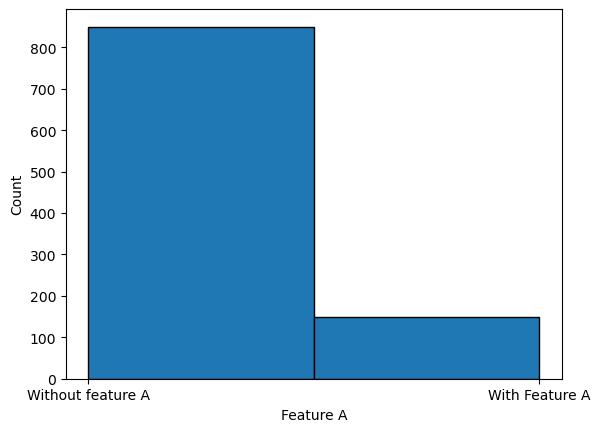

In [16]:
#Example

import numpy as np
import matplotlib.pyplot as plt

totalProduct = 1000
featureA = 150
noFeatureA = totalProduct - featureA

data = [1] * featureA + [0] * noFeatureA

np.random.shuffle(data)

plt.hist(data, bins=2, edgecolor = "black")
plt.xticks([0,1], ["Without feature A", "With Feature A"])
plt.xlabel("Feature A")
plt.ylabel("Count")
plt.show()

C:\Users\hoguzcan\Anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


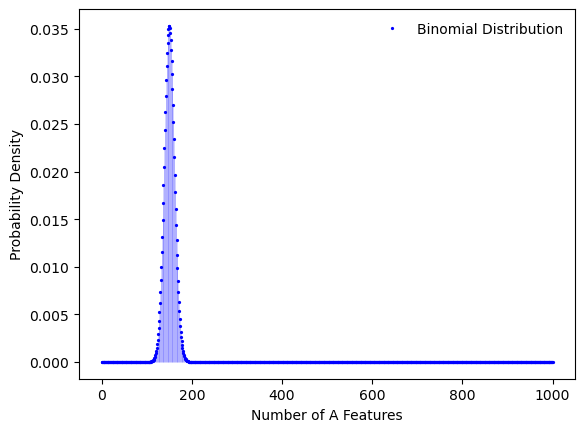

In [17]:
#Example

import scipy as sp

n = totalProduct = 1000
p = featureA = 150 / totalProduct
x = np.arange(0, n+1)
binomDist = sp.stats.binom(n, p).pmf(x)

plt.plot(x, binomDist, 'bo', ms=1.3, label='Binomial Distribution')
plt.vlines(x, 0, binomDist, colors="b", lw=0.6, alpha=0.2)
plt.legend(loc="best", frameon=False)
plt.xlabel("Number of A Features")
plt.ylabel("Probability Density")
plt.show()


#### P-value and Probability Detection with T-Test


P-value is the probability obtained by comparing a sample data to the hypothesized parameter value using a test statistic. This probability is used to determine whether our hypothesis is correct or not. Although there are differences between ANOVA (Analysis of Variance) and p-value calculations, they are generally considered the same in the literature, although some people argue otherwise.

Margin of error: $0.05$

Generally, p-value calculations are done with hypothesis tests such as t-test. The p-value is used to determine whether a difference between two samples is due to chance or a significant difference. However, p-value calculations can also be performed outside of hypothesis tests such as t-tests.

The binomial distribution is a probability distribution that results in only two outcomes (success or failure) in a certain number of trials. The probability of success in one trial is p, and the probability of failure is 1-p.

The expected value and standard deviation of a binomial distribution can be calculated using the following formulas:


Expected Value: $\mu = n*p$

Standard Deviation: $\sigma = \sqrt{np(1-p)}$

Here, n is the number of trials. p is the probability of success. σ is the standard deviation, and μ is the expected value.


T-value:  0.0044000627128063805
P-value:  0.9964982137156326


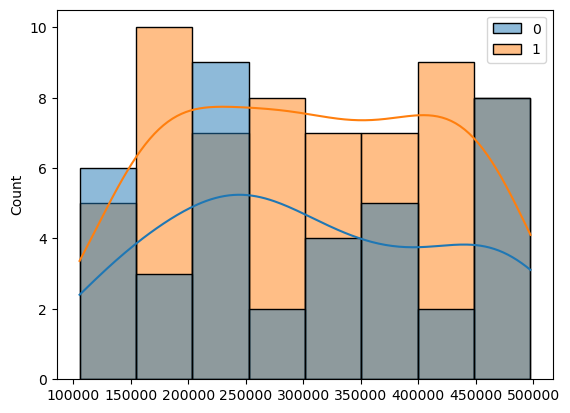

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import random as r

car_brands = ["BMW", "Mercedes", "Toyota", "Honda", "Audi"]
car_years = [r.randint(2003, 2023) for i in range(100)]
car_prices = [r.randint(100000, 500000) for i in range(100)]
car_colors = ["Black", "White", "Red", "Gray", "Blue"]
car_colors = [r.choice(car_colors) for i in range(100)]

old_cars = [price for year, price in zip(car_years, car_prices) if year < 2013]
new_cars = [price for year, price in zip(car_years, car_prices) if year >= 2013]

t, p = ttest_ind(old_cars, new_cars)

print("T-value: ", t)
print("P-value: ", p)

sns.histplot(data=[old_cars, new_cars], kde=True)
plt.show()


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


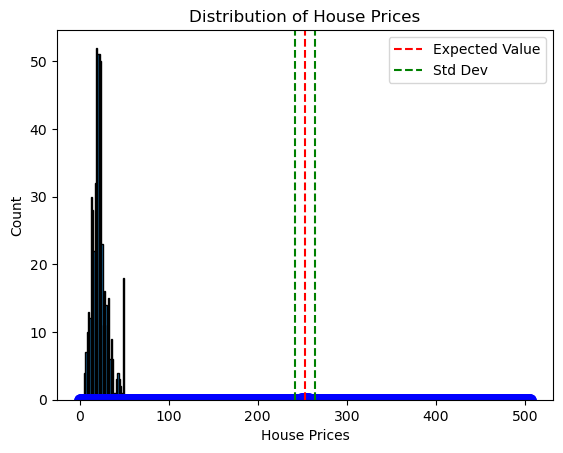

In [19]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

df = pd.read_csv('housing.csv')
print(df.head())

medv = df["MEDV"]
n = len(medv)
p = 0.5
expected_value = n * p
std_dev = (n * p * (1 - p)) ** 0.5

binomD = sp.stats.binom(n, p)

x = range(n + 1)
plt.plot(x, binomD.pmf(x), 'bo', ms=8)

plt.hist(df["MEDV"], bins=30, edgecolor='black')
plt.xlabel("House Prices")
plt.ylabel("Count")
plt.axvline(x=expected_value, color='r', linestyle='--', label='Expected Value')
plt.axvline(x=expected_value + std_dev, color='g', linestyle='--', label='Std Dev')
plt.axvline(x=expected_value - std_dev, color='g', linestyle='--')
plt.legend()
plt.title("Distribution of House Prices")
plt.show()


#### Normal Distribution

We assume the mean of the data as a central point, which helps to ensure the symmetry of the distribution around the center. This is called the normal distribution. By standard deviation, we mean that the distribution should show a symmetric distribution according to the standard deviation value. As the standard deviation increases, the spread of the distribution widens.

* A certain mean

* A certain standard deviation

* A bell-shaped distribution

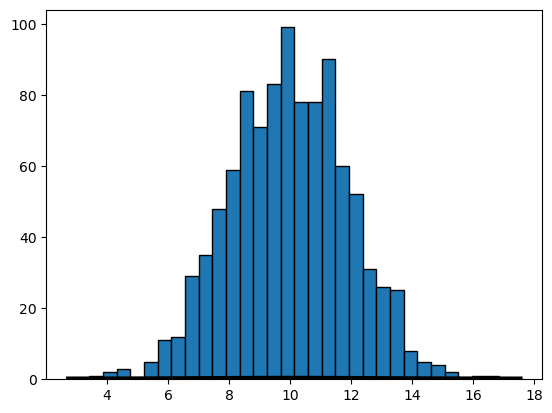

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(10, 2, 1000)

plt.hist(data, bins=30, edgecolor='black')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = (1 / (2 * np.pi * 4) ** 0.5) * np.exp(-(x - 10) ** 2 / 16)
plt.plot(x, p, 'k', linewidth=4)

plt.show()


#### Standard Normal Distribution

It is a normal distribution with a mean value of 0 and a standard deviation of 1. It is widely used in statistics. It helps to standardize a normal distribution. Any normal distribution can be transformed into a standard normal distribution. It is also used in statistical tests because sometimes data may not follow a normal distribution. Standard normal distribution can be used in probability calculations. It is also very important in modeling.


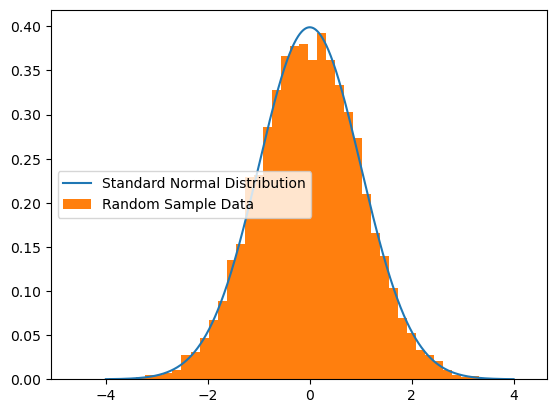

In [21]:
#Example

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

data = np.random.normal(0, 1, 10000)

x = np.linspace(-4, 4, num=1000)
y = sp.stats.norm.pdf(x, loc=0, scale=1)

plt.plot(x, y, label="Standard Normal Distribution")
plt.hist(data, bins=50, density=True, label="Random Sample Data")
plt.legend()
plt.show()



#### Finding Probability for a given x value
Finding probability for a given x value involves calculating the probability of the x value being in a certain range or being equal to or greater/less than a certain value, using a particular probability distribution. For example, using the normal distribution, in a dataset with a certain mean and standard deviation, the probability of an x value being in a certain range or being equal to a certain value can be calculated. This is a fundamental part of many statistical analyses and is commonly used in areas such as hypothesis testing, confidence intervals, and regression analysis.

Probability of students getting 85 or above: 15.865525393145708


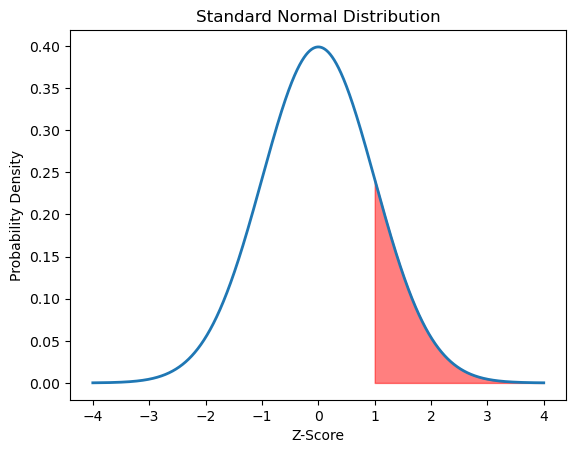

In [22]:
#Example

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 75
std_dev = 10

x = 85

z_score = (x - mean) / std_dev
p = 1 - norm.cdf(z_score)

print("Probability of students getting 85 or above:", p * 100)

x = np.arange(-4, 4, 0.001)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, linewidth=2)

plt.fill_between(x, y, 0, where=x >= z_score, color='red', alpha=0.5)
plt.title("Standard Normal Distribution")
plt.xlabel("Z-Score")
plt.ylabel("Probability Density")
plt.show()

#### Normal Approximation for Binomial Distribution

Normal approximation for the binomial distribution is based on the assumption that the binomial distribution can be approximated by the normal distribution under certain conditions. These conditions are:

    n is a large number.
    p is close to 0.5.
    np and n(1-p) are large numbers.

When these conditions are met, the binomial distribution can be approximated by the normal distribution, and this approximation can be calculated with a mean value of μ = np and a standard deviation of σ = √(np(1-p)).

This approximation is commonly used in statistical analysis when the sample size is large, and it simplifies many calculations.


Mean:  50.0
Standard Deviation:  5.0
p:  0.5
n:  100


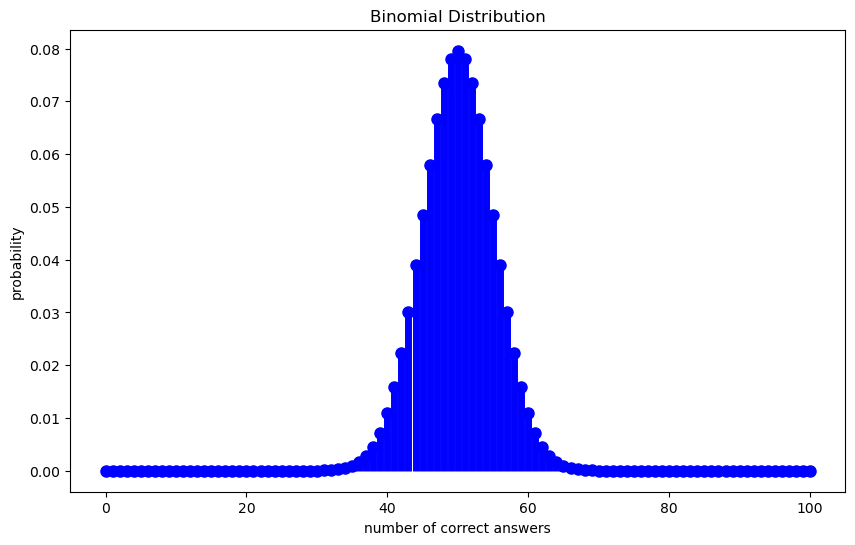

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

n=100 # number of trials
p=0.5 # probability of success

mean = n * p
stdDev = np.sqrt(n * p * (1 - p))
print("Mean: ", mean)
print("Standard Deviation: ", stdDev)

binomDist = scipy.stats.binom(n, p)

x = np.arange(0, n + 1)

bnmPMF = binomDist.pmf(x)

print("p: ", p)
print("n: ", n)

fig,ax = plt.subplots(figsize = (10,6))
ax.plot(x, bnmPMF,'bo',ms = 8)
ax.vlines(x, 0, bnmPMF, colors = 'b', lw = 5)
ax.set_xlabel('number of correct answers')
ax.set_ylabel('probability')
ax.set_title("Binomial Distribution")
plt.show()
